## GemPy Sandbox Addon Tutorial


The Sandbox addon to GemPyconsists in general of four classes:
    - Kinect class: handles the aquisition of depth data 
    - Beamer class: handles the frame composition
    - Calibration class: methods and variables to manage the relation of the sandbox, the beamer and the kinect sensor
    - Model Class: stores the gempy model 
It is possible to have multiple instances of each class and you can construct a sandbox with multiple beamers and more than one kinect sensor. This tutorial however covers only the most simple case of a sandbox with a single kinect and beamer. Lets start with importing the required dependancies:

In [1]:
import sys, os
sys.path.append("../../..")

import gempy as gp
import gempy.addons.sandbox as sb 

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Initialize Kinect
To use the Kinect and the Sandbox addon you need The Freenect Drivers to be installed with Python wrappers (see here for Instructions:https://github.com/OpenKinect/libfreenect/tree/master/wrappers/python ) 
If you do not have a kinect connected you can use the Argument `dummy=True`  for testing. `Kinect.get_frame()` and `Kinect.get_filtered_frame()` will return a synthetic depth frame, other functions may not work

In [2]:
kinect=sb.Kinect(dummy=True)
#kinect=sb.Kinect()

dummy mode. get_frame() will return a synthetic depth frame, other functions may not work


In [3]:
import freenect
import matplotlib.pyplot as plt

In [4]:
#image = freenect.sync_get_video()[0]


In [5]:
# n=5
# name="test_frameb"+str(n)+".png"
# plt.imsave(name, image)


In [6]:
d=kinect.get_filtered_frame()
print(d)

[[ 800.  803.  807. ...,  788.  792.  796.]
 [ 800.  803.  807. ...,  788.  792.  796.]
 [ 800.  803.  807. ...,  788.  792.  796.]
 ..., 
 [ 800.  803.  807. ...,  788.  792.  796.]
 [ 800.  803.  807. ...,  788.  792.  796.]
 [ 800.  803.  807. ...,  788.  792.  796.]]


## Initialize beamer 
create a beamer instance and set the correct native resolution of your beamer. Starting the stream will open a new window in your browser that shows the output and refreshs it in 100ms intervalls. In Chrome use Cmd+Shift+F to hide the Browser bar.

In [7]:
beamer=sb.Beamer()

calibration not provided or invalid. a new calibration was created.


In [8]:
beamer.resolution=(1920,1080)

In [9]:
beamer.start_stream()

## Calibration
A calibration instance is automatically created with the beamer instance. Adjust the Values in the IpyWidget until your beamer window is in alignment with the topography in the sandbox. Calibration can be saved and loaded with `calibration.save()` and `calibration.load()`

In [10]:
calibration=beamer.calibration

In [11]:
calibration.create()
#beamer.calibrate() #alternative commands, does the same.


no associated kinect specified, using last kinect instance created


interactive(children=(IntSlider(value=0, continuous_update=False, description='rot_angle', max=180, min=-180), IntRangeSlider(value=(0, 640), continuous_update=False, description='x_lim', max=640), IntRangeSlider(value=(0, 480), continuous_update=False, description='y_lim', max=480), IntSlider(value=0, description='x_pos', max=800), IntSlider(value=0, description='y_pos', max=600), FloatSlider(value=1.0, continuous_update=False, description='scale_factor', max=4.0, min=0.1, step=0.01), IntRangeSlider(value=(800, 1400), continuous_update=False, description='z_range', max=2000, min=500), IntSlider(value=400, continuous_update=False, description='box_width', max=2000), IntSlider(value=300, continuous_update=False, description='box_height', max=2000), ToggleButton(value=False, description='display a legend', icon='check', tooltip='Description'), IntRangeSlider(value=(550, 799), continuous_update=False, description='legend_x_lim', max=800), IntRangeSlider(value=(500, 550), continuous_update=False, description='legend_y_lim', max=600), ToggleButton(value=False, description='display a profile area', icon='check', tooltip='Description'), IntRangeSlider(value=(750, 799), continuous_update=False, description='profile_x_lim', max=800), IntRangeSlider(value=(500, 599), continuous_update=False, description='profile_y_lim', max=600), ToggleButton(value=False, description='display a hot area for qr codes', icon='check', tooltip='Description'), IntRangeSlider(value=(750, 799), continuous_update=False, description='hot_x_lim', max=800), IntRangeSlider(value=(500, 599), continuous_update=False, description='hot_y_lim', max=600), ToggleButton(value=False, description='Close calibration', icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

In [12]:
#calibration.save(calibration_file="calibration.dat")

In [13]:
calibration.load(calibration_file="sandbox_VRlab.dat")

In [12]:
kinect.get_frame()

array([[ 800.,  803.,  807., ...,  788.,  792.,  796.],
       [ 800.,  803.,  807., ...,  788.,  792.,  796.],
       [ 800.,  803.,  807., ...,  788.,  792.,  796.],
       ..., 
       [ 800.,  803.,  807., ...,  788.,  792.,  796.],
       [ 800.,  803.,  807., ...,  788.,  792.,  796.],
       [ 800.,  803.,  807., ...,  788.,  792.,  796.]])

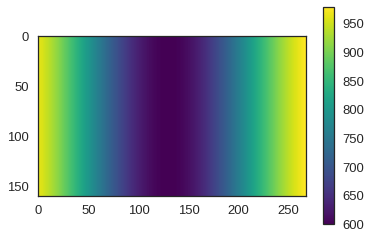

In [13]:
import matplotlib.pyplot as plt
plt.imshow(kinect.depth[50:210, 110:378], cmap='viridis')
plt.colorbar()

In [16]:
calibration.calibration_data['y_lim']

(50, 232)

In [17]:
#import numpy as np
#np.save("sand_velocity2", kinect.depth[50:210, 110:378])

## Create a model
The sandbox can visualize any kind of Gempy model. Check out the other tutorials or this you6ube video [link] to learn how to create your own model.
We use the model from Chapter 1:

In [14]:
geo_data = gp.create_data([0,2000,0,2000,0,2000],[30,30,30], 
                          path_o = os.pardir+"/../input_data/tut_chapter1/simple_fault_model_orientations.csv", # importing orientation (foliation) data
                          path_i = os.pardir+"/../input_data/tut_chapter1/simple_fault_model_points.csv") # importing point-positional interface data

gp.set_series(geo_data, {"Fault_Series":'Main_Fault', 
                         "Strat_Series": ('Sandstone_2','Siltstone',
                                          'Shale', 'Sandstone_1')},
                       order_series = ["Fault_Series", 'Strat_Series'],
                       order_formations=['Main_Fault', 
                                         'Sandstone_2','Siltstone',
                                         'Shale', 'Sandstone_1',
                                         ], verbose=0) 

interp_data = gp.InterpolatorData(geo_data, 
                                  output='geology', compile_theano=True,
                                  theano_optimizer='fast_compile',
                                  verbose=[])

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


## Prepare the model for the sandbox
The Interpolator object we just created is what defines the model in the sandbox.
First we create a Model instance out of it, then we perform some steps to prepare the Model for the Sandbox.

In [15]:
import threading
    
lock = threading.Lock()

In [16]:
model=sb.Model(interp_data, lock=lock)


no calibration specified, using last calibration instance created


In [17]:
model.calculate_scales()
model.create_empty_depth_grid()

#model.setup(start_stream=False) #conveniently, the steps above are performed automatically when calling this function

Aspect ratio of the model is fixed in XY
Model size is limited by Y dimension
scale in Model units/ mm (X,Y,Z): [4.166666666666667, 4.166666666666667, 3.3333333333333335]


## Run Sandbox
Our Sandbox is now set up and ready to go. 
You can start the runloop with a simple command:

In [18]:

t = threading.Thread(target=sb.run_model, args=(model,), daemon=None)

In [19]:
t.start()

In [40]:
t.isAlive()

False

In [21]:
vtk_plot = gp.plotting.vtkPlot(geo_data, lock=lock)

In [26]:
vtk_plot.close()

In [22]:
vtk_plot.plot_surfaces_3D_real_time(interp_data)

holding... Use vtk.resume to go back to the interactive window


In [24]:
model.stop_threat=True

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/home/miguel/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/miguel/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "../../../gempy/addons/sandbox.py", line 555, in run_model
    raise Exception('Threat stopped')
Exception: Threat stopped



In [23]:
vtk_plot.observe_df(geo_data, 'interfaces')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True}, precision=5, show_toolbar=True)

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/miguel/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/miguel/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "../../../gempy/plotting/plot.py", line 183, in plot_surfaces_3D_real_time
    self.vv.set_interfaces()
  File "../../../gempy/plotting/visualization.py", line 934, in set_interfaces
    n_sphere=e, n_render=3, n_index=index))
  File "../../../gempy/plotting/visualization.py", line 796, in create_sphere
    s.SetInteractor(self.interactor)
AttributeError: 'vtkVisualization' object has no attribute 'interactor'



holding... Use vtk.resume to go back to the interactive window


Exception in thread Thread-12:
Traceback (most recent call last):
  File "/home/miguel/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/miguel/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "../../../gempy/addons/sandbox.py", line 553, in run_model
    beamer.show(input="current_frame.png")
  File "../../../gempy/addons/sandbox.py", line 175, in show
    if self.calibration.calibration_data['legend_area'] is not False:
KeyError: 'legend_area'



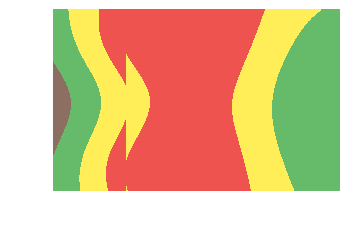

In [35]:
vtk_plot.plot_surfaces_3D_real_time(interp_data)

In [36]:
vtk_plot.resume()

closing vtk


In [37]:
vtk_plot.close()

In [38]:
t = threading.Thread(target=sb.run_model, args=(model,), daemon=None)

In [39]:
sb.run_model(model)

KeyError: 'legend_area'

by default the depth data is filtered and smoothed to get clearer and less noisy layer boundaries.  If you need more control or want to play around you can also define your own run loops:
    

In [ ]:
while True:
    depth = kin.get_frame()
    model.update_grid(depth)
    model.render_frame(outfile="current_frame.png")
    beamer.show(input="current_frame.png")

In [ ]:
while True:
    depth = kin.get_filtered_frame(n_frames=10, sigma_gauss=2)
    model.update_grid(depth)
    model.render_frame(outfile="current_frame.png")
    beamer.show(input="current_frame.png")